In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [4]:
# Load the Linnerud dataset
linnerud = datasets.load_linnerud()
X, y = linnerud.data, linnerud.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.2, random_state=42)


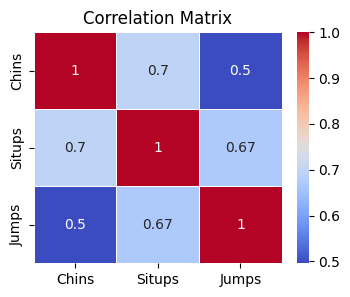

In [9]:
# Create a DataFrame for the Linnerud dataset
df = pd.DataFrame(data=X, columns=linnerud.feature_names)
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


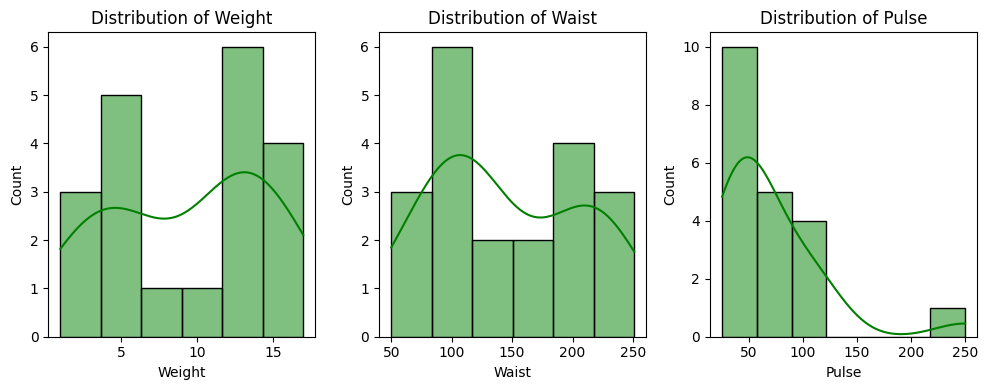

In [10]:
df = pd.DataFrame(data=X, columns=linnerud.target_names)
# Plot the distribution of the target variables
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['Weight'], kde=True, color='green')
plt.title('Distribution of Weight')

plt.subplot(1, 3, 2)
sns.histplot(df['Waist'], kde=True, color='green')
plt.title('Distribution of Waist')

plt.subplot(1, 3, 3)
sns.histplot(df['Pulse'], kde=True, color='green')
plt.title('Distribution of Pulse')

plt.tight_layout()
plt.show()


In [11]:
# Create and train the multioutput regression model (ElasticNet)
multioutput_model = MultiOutputRegressor(
	ElasticNet(alpha=0.5, l1_ratio=0.5), n_jobs=5)
multioutput_model.fit(X_train, y_train)

# Create and train the decision tree regressor model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Create and train the random forest regressor model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [12]:
# Make predictions
multioutput_pred = multioutput_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
forest_pred = forest_model.predict(X_test)

# Calculate performance metrics for multioutput model
multioutput_mse = mean_squared_error(y_test, multioutput_pred)
multioutput_mae = mean_absolute_error(y_test, multioutput_pred)


# Calculate performance metrics for decision tree model
tree_mse = mean_squared_error(y_test, tree_pred)
tree_mae = mean_absolute_error(y_test, tree_pred)

# Calculate performance metrics for random forest model
forest_mse = mean_squared_error(y_test, forest_pred)
forest_mae = mean_absolute_error(y_test, forest_pred)

# Print the performance metrics
print("Multioutput Model - Mean Squared Error:", multioutput_mse)
print("Multioutput Model - Mean Absolute Error:", multioutput_mae)
print("Decision Tree Model - Mean Squared Error:", tree_mse)
print("Decision Tree Model - Mean Absolute Error:", tree_mae)
print("Random Forest Model - Mean Squared Error:", forest_mse)
print("Random Forest Model - Mean Absolute Error:", forest_mae)


Multioutput Model - Mean Squared Error: 236.22543973611664
Multioutput Model - Mean Absolute Error: 10.015359327324278
Decision Tree Model - Mean Squared Error: 371.9166666666667
Decision Tree Model - Mean Absolute Error: 12.083333333333334
Random Forest Model - Mean Squared Error: 242.75831666666667
Random Forest Model - Mean Absolute Error: 10.656666666666666


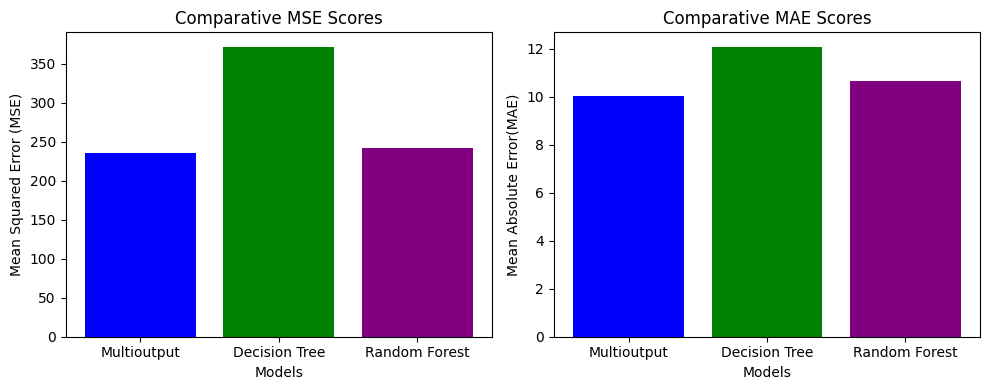

In [13]:
# Create a comparative visualization
plt.figure(figsize=(10, 4))
models = ['Multioutput', 'Decision Tree', 'Random Forest']
mse_scores = [multioutput_mse, tree_mse, forest_mse]
mae_scores = [multioutput_mae, tree_mae, forest_mae]

# Plot Mean Squared Error (MSE)
plt.subplot(1, 2, 1)
plt.bar(models, mse_scores, color=['blue', 'green', 'purple'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparative MSE Scores')

# Plot R-squared Score (R2)
plt.subplot(1, 2, 2)
plt.bar(models, mae_scores, color=['blue', 'green', 'purple'])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error(MAE)')
plt.title('Comparative MAE Scores')

plt.tight_layout()
plt.show()
